#Checkers con IA - Team Skynet (Juan Lagares, Carlos Pallares y Eduardo Ahumada)

El problema de jugar damas y nunca perder usando inteligencia artificial se abordó de la siguiente forma:

1. Definición del tablero y fichas
2. Movimientos
3. Movimientos fichas damas
4. Movimientos fichas normales
5. Casos especiales de movimiento
6. Creación de árbol e implementación de algoritmo minimax con poda 




In [ ]:
import random 
import copy
import numpy as np

# 1. Definición del tablero y fichas
  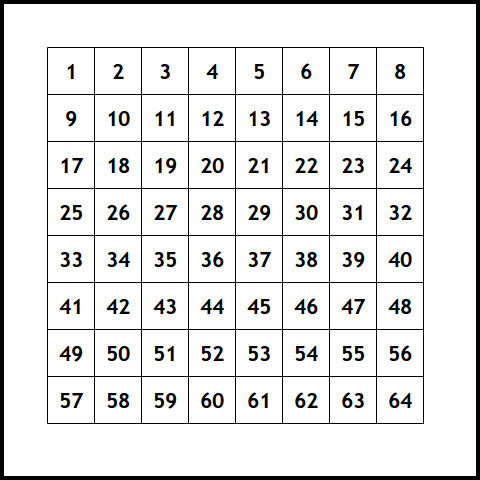


#Código de clase ficha y nodo de árbol

Se define una posición basada en la imagen anterior, si mi ficha está en la casilla 55 y soy el oponente, se representará con -55 de lo contrario con 55.

Se verifica si nuestra ficha es dama con la variable booleana kings y color_ es la variable que indica nuestro bando, -1 para rojas y 1 para blancas

In [ ]:
class piece:
    def __init__(self, pos_,king,color_):
      self.pos = pos_ 
      self.k=king
      self.color= color_ # 1 para blanca , -1 para negra

In [ ]:
class node:
  def __init__(self,value,depth_,father):
    self.player = player_
    self.value = value_
    self.depth = depth_
    self.childs = []
    self.father=father
    self.createChilds()

  def createChilds(self):
    if self.depth >=0:
      self.childs.append(node(-self.player, value,self.depth - 1))

In [ ]:
class node_:
    def __init__(self,ocupated,kings_,heuristica,jugada,ficha):
        self.estado = ocupated # Single object
        self.heuristica = heuristica  # Array of objects
        self.kings=kings_
        self.play=jugada
        self.ficha=ficha
        self.posibility=[]

#Movimiento
El movimiento fue realizado basandose en el tablero inicialmente mostrado, si una ficha desea moverse a su izquierda vista desde el lado del tablero debe restarsele 9 casillas y para la derecha 7.

Para saltar fichas (comer) a izquierda se verifica la disponibilidad de una casilla a 18 posiciones despues de nuestra ficha y 14 para la derecha.

Para las damas se realiza exactamente lo mismo pero verificamos movimientos hacia atrás tambien.

Un salto de ficha puede llevar a varios mas por lo cual esto es validado, cada vez que se salta una ficha se verifica si puede seguir saltando y se escoge una dirección random caso tal existan varias opciones de salto. Saltar puede llevarnos a ser damas al igual que hacer movimientos con fichas, esto está validado y se otorga un puntaje adicional al movimiento caso tal sea así.

Saltar damas también adiciona puntos adicionales a diferencia de saltar una ficha convencional.

#Código para ***mover ficha no dama*** en dirección izquierda y derecha

In [ ]:
def check_no_kill_no_king_derecha(piece, ocupated):

  pos_1=piece.pos - 7
  edges_izq=[1,9,17,25,33,41,49,57]
  edges_der=[8,16,24,32,40,48,56,64]

  if piece.pos > 0:

    if  pos_1 not in ocupated and -pos_1 not in ocupated and abs(piece.pos) not in edges_der:
      ocupated.remove(piece.pos)
      ocupated.append(pos_1)
      piece.pos=pos_1

  else:

    if  pos_1 not in ocupated and -pos_1 not in ocupated and abs(piece.pos) not in edges_izq:
      ocupated.remove(piece.pos)
      ocupated.append(pos_1)
      piece.pos=pos_1

def check_no_kill_no_king_izquierda(piece, ocupated):

  pos_1=piece.pos - 9
  edges_izq=[1,9,17,25,33,41,49,57]
  edges_der=[8,16,24,32,40,48,56,64]

  if piece.pos >0:

    if  pos_1 not in ocupated and -pos_1 not in ocupated and abs(piece.pos) not in edges_izq:
      ocupated.remove(piece.pos)
      ocupated.append(pos_1)
      piece.pos=pos_1

  else:

    if  pos_1 not in ocupated and -pos_1 not in ocupated and abs(piece.pos) not in edges_der:
      ocupated.remove(piece.pos)
      ocupated.append(pos_1)
      piece.pos=pos_1


#Código para ***matar con ficha no dama*** a izquierda y derecha y verificando el no salirse del tablero

Primero se verifica si la ficha puede saltar, de ser así entro en un ciclo while en el cual usamos esa opción de salto para verificar un nuevo salto y así iterativamente. En caso de tener varias opciones de salto en un turno se toma de forma aleatoria cual realizar. El ciclo while solo frenara sus itereaciones si estoy en una posición la cual no genera saltos. La última posición es devuelta y actualiza la posición de la ficha.


In [ ]:
def check_kill_no_king_der(p, ocupated,edges):

  pos_1=p.pos - 7
  pos_2=p.pos - 14

  if  -pos_1 in ocupated and pos_2 not in ocupated and -pos_2 not in ocupated and abs(pos_1) not in edges:
    ocupated.remove(p.pos)
    p.pos=pos_2
    ocupated.remove(-pos_1)
    ocupated.append(p.pos)


def check_kill_no_king_izq(p,ocupated,edges):

  pos_1=p.pos - 9
  pos_2=p.pos - 18

  if  -pos_1 in ocupated and pos_2 not in ocupated and -pos_2 not in ocupated and abs(pos_1) not in edges:
    ocupated.remove(p.pos)
    p.pos=pos_2
    ocupated.remove(-pos_1)
    ocupated.append(p.pos)
    

In [ ]:
import copy

def check_kills_with_no_king(p,ocupated):

  color=p.color
  edges=[1,2,3,4,5,6,7,8,16,24,32,40,48,56,64,63,62,61,60,59,58,57,49,41,33,25,17,9]
  lista=[]
  while True:

    piece_x=copy.deepcopy(p)
    ocupated_x=copy.deepcopy(ocupated)

    check_kill_no_king_izq(piece_x, ocupated_x,edges)
    ocupated.sort()
    ocupated_x.sort()
    if ocupated!=ocupated_x:
      lista.append(1)

    piece_x=copy.deepcopy(p)
    ocupated_xx=copy.deepcopy(ocupated)

    check_kill_no_king_der(piece_x, ocupated_xx,edges)
    ocupated.sort()
    ocupated_xx.sort()
    if ocupated!=ocupated_xx:
      lista.append(2)
      
    if len(lista) == 0:
      break

    f=random.choice(lista)

    z=ocupated

    if f==1:
          check_kill_no_king_izq(p, z,edges)
    if f==2:
          check_kill_no_king_der(p, z,edges)
    lista=[]

#Volverse rey
El siguiente codigo toma la posición actual y luego la siguiente arrojada por el movimiento disponible de la ficha en ese momento, si existió un cambio en su posicón, no está en la lista de damas y se encuentra en uno de los bordes, su etado de dama pasa a estar activo.

Verificar que exista un cambio de movimiento es importante, porque las fichas pueden estar en uno de los bordes donde comenzaron y ser tomadas como damas.

In [ ]:
#Se chequea despues de cada función que se llame.

def check_if_king_now(pos,p,kings):
  edges_arriba=[1,2,3,4,5,6,7,8]
  edges_abajo=[57,58,59,60,61,62,63,64]
  if pos != p.pos and  p.pos not in kings:
    if abs(p.pos) in edges_arriba or abs(p.pos) in edges_abajo:
      kings.append(p.pos)

#Descartar dama caso tal sea eliminado

Se realiza una ***intercepción*** entre el listado de damas del tablero actual versus las damas del tablero luego de haber seleccionado una opción de movimiento para una ficha o dama. Si la lista retornada es igual a la original se mantienen las damas, de no ser así se verifica con heuristica para obtener un puntaje para la jugada.

In [ ]:
def descartar_rey(ocupated,kings):
  kings=list(set(ocupated) & set(kings))
  return kings

#Verificar movimiento de rey luego de matar o solo moverse

In [ ]:
def mov_king(pos,p,kings):
  if p.pos in kings and pos in kings:
    kings.remove(pos)
    kings.append(p.pos)

#***Movimientos y saltos de damas***

#Código para mover ***damas***
El movimiento de las damas varia respecto a las fichas convencionales solo en que pueden realizar movimientos y saltos hacia atrás. Los movimientos de ficha convecionales fueron reutilizados en esta sección pero ***solo se agregaron movimiento hacia arriba o hacia abajo en caso de ser roja o blanca respectivamente***.

In [ ]:
def check_no_kill_king_derecha_arriba(piece, ocupated,color):

  pos_1=abs(piece.pos) - 7
  edges_der=[8,16,24,32,40,48,56,64]
  edges_arriba=[1,2,3,4,5,6,7,8]

  if  pos_1 not in ocupated and -pos_1 not in ocupated and abs(piece.pos) not in edges_der and abs(piece.pos) not in edges_arriba :
    ocupated.remove(piece.pos)
    ocupated.append(piece.pos - 7*color)
    piece.pos=piece.pos - 7*color

def check_no_kill_king_derecha_abajo(piece, ocupated,color):

  edges_der=[8,16,24,32,40,48,56,64]
  edges_abajo=[57,58,59,60,61,62,63,64]

  pos_1=abs(piece.pos) + 9

  if  pos_1 not in ocupated and -pos_1 not in ocupated and abs(piece.pos) not in edges_der and abs(piece.pos) not in edges_abajo:
    ocupated.remove(piece.pos)
    ocupated.append(piece.pos +9*color)
    piece.pos=piece.pos +9*color

In [ ]:
def check_no_kill_king_izquierda_arriba(piece, ocupated,color):
  edges_izq=[1,9,17,25,33,41,49,57]
  edges_arriba=[1,2,3,4,5,6,7,8]

  pos_1=abs(piece.pos) - 9

  if  pos_1 not in ocupated and -pos_1 not in ocupated and abs(piece.pos) not in edges_izq and abs(piece.pos) not in edges_arriba:
    ocupated.remove(piece.pos)
    ocupated.append(piece.pos - 9*color)
    piece.pos=piece.pos - 9*color

def check_no_kill_king_izquierda_abajo(piece, ocupated,color):
  edges_izq=[1,9,17,25,33,41,49,57]
  edges_abajo=[57,58,59,60,61,62,63,64]
  pos_1=abs(piece.pos) + 7

  if  pos_1 not in ocupated and -pos_1 not in ocupated and abs(piece.pos) not in edges_izq and abs(piece.pos) not in edges_abajo:
    ocupated.remove(piece.pos)
    ocupated.append(piece.pos +7*color)
    piece.pos=piece.pos +7*color

#Código para matar con ficha rey
Se verifica con los ***mismos movimientos que el saltar con ficha convencional***, pero se verifica no solo frente a la ficha sino atrás de está y tampoco se realizan salto caso tal la ficha a eliminar este en un borde.

In [ ]:
def check_kill_king_derecha_arriba(piece, ocupated,color,edges):

  pos_1=abs(piece.pos) - 7
  pos_2=abs(piece.pos) - 14

  if  -pos_2 not in ocupated and pos_2 not in ocupated and -pos_1*color in ocupated and pos_1 not in edges:
    ocupated.remove(piece.pos)
    piece.pos=pos_2*color
    ocupated.remove(-pos_1*color)
    ocupated.append(piece.pos)

def check_kill_king_derecha_abajo(piece, ocupated,color,edges):
  pos_1=abs(piece.pos) + 9
  pos_2=abs(piece.pos) + 18
  if  -pos_2 not in ocupated and pos_2 not in ocupated and -pos_1*color in ocupated and pos_1 not in edges:
    ocupated.remove(piece.pos)
    piece.pos=pos_2*color
    ocupated.remove(-pos_1*color)
    ocupated.append(piece.pos)

In [ ]:
def check_kill_king_izquierda_arriba(piece, ocupated,color,edges):

  pos_1=abs(piece.pos) - 9
  pos_2=abs(piece.pos) - 18
  if  -pos_2 not in ocupated and pos_2 not in ocupated and -pos_1*color in ocupated and pos_1 not in edges:
    ocupated.remove(piece.pos)
    piece.pos=pos_2*color
    ocupated.remove(-pos_1*color)
    ocupated.append(piece.pos)

def check_kill_king_izquierda_abajo(piece, ocupated,color,edges):

  pos_1=abs(piece.pos) + 7
  pos_2=abs(piece.pos) + 14

  if  -pos_2 not in ocupated and pos_2 not in ocupated and -pos_1*color in ocupated and pos_1 not in edges:
    ocupated.remove(piece.pos)
    piece.pos=pos_2*color
    ocupated.remove(-pos_1*color)
    ocupated.append(piece.pos)

#Código para ***matar con Dama de forma iterativa y aleatoria*** cuando existen varias opciones
Primero generamos copias del estado actual del tablero y chequeamos los movimientos relacionados con salto de fichas, ***arriba a la derecha***, ***arriba a la izquierda***, ***abajo a la derecha*** y ***abajo a la izquierda***, de cumplirse al menos uno de los casos se selecciona uno aleatoriamente y este devuelve el estado resultante que luego es pasado como el actual y se repite el proceso hasta que no existan opciones que devolver.

In [ ]:
def check_kills_with_king(p,ocupated):

  color=p.color
  edges=[1,2,3,4,5,6,7,8,16,24,32,40,48,56,64,63,62,61,60,59,58,57,49,41,33,25,17,9]
  lista=[]
  while True:

    piece_x=copy.deepcopy(p)

    ocupated_x=copy.deepcopy(ocupated)
    check_kill_king_izquierda_abajo(piece_x, ocupated_x,color,edges)
    ocupated.sort()
    ocupated_x.sort()
    if ocupated!=ocupated_x:
      lista.append(1)

    piece_x=copy.deepcopy(p)
    ocupated_xx=copy.deepcopy(ocupated)

    check_kill_king_izquierda_arriba(piece_x, ocupated_xx,color,edges)
    ocupated.sort()
    ocupated_xx.sort()
    if ocupated!=ocupated_xx:
      lista.append(2)

    piece_x=copy.deepcopy(p)
    ocupated_xxx=copy.deepcopy(ocupated)
        
    check_kill_king_derecha_abajo(piece_x, ocupated_xxx,color,edges)
    ocupated.sort()
    ocupated_xxx.sort()
    if ocupated!=ocupated_xxx:
      lista.append(3)

    piece_x=copy.deepcopy(p)
    ocupated_xxxx=copy.deepcopy(ocupated)

    check_kill_king_derecha_arriba(piece_x, ocupated_xxxx,color,edges)
    ocupated.sort()
    ocupated_xxxx.sort()
    if ocupated!=ocupated_xxxx:
      lista.append(4)
    if len(lista) == 0:
      break

    f=random.choice(lista)

    z=ocupated

    if f==1:
          check_kill_king_izquierda_abajo(p, z,color,edges)
    if f==2:
          check_kill_king_izquierda_arriba(p, z,color,edges)
    if f==3:
          check_kill_king_derecha_abajo(p, z,color,edges)
    if f==4:
          check_kill_king_derecha_arriba(p, z,color,edges)
    lista=[]


#Heuristica

*   Por cada ficha eliminada se agregan 6 puntos
*   Por cada ficha expuesta luego de un movimiento se restan 2 puntos
*   Volverse dama agrega 5 puntos
*   Eliminar una dama agrega 8 puntos
*   Las fichas blancas(IA) tienen una penalización mayor a las rojas cuando dejan fichas expuestas
*   Se agregan puntos o se restan dependiendo de que cuantas fichas a favor tengamos
*   Cada jugada queda registrada con un puntaje, estado del tablero, ficha que se jugó y lista de damas. Los 4 registros anteriores son los atributos de los nodos para armar nuestro árbol

***La ejecución de la heuristica genera todas las jugadas posibles para una ficha respecto a un tablero actual***.











In [ ]:
def heuristica(ocupated,kings):
  nodos=[]
  ocupateD=copy.deepcopy(ocupated)
  ocupated.sort()
  ocupateD.sort()
  for i in ocupateD:

    p=piece(i,False, i/abs(i))

    sum=0
    if i in kings:
      p_x_=copy.deepcopy(p)
      ocupated_x_=copy.deepcopy(ocupated)
      check_kills_with_king(p_x_,ocupated_x_)
      ocupated_x_.sort()
      if ocupateD!=ocupated_x_:

        kings_x_=copy.deepcopy(kings)
        p_xx_=copy.deepcopy(p)
        kings_xx_=(descartar_rey(ocupated_x_,kings_x_))
        kings_xx_.append(p_x_.pos)

        if abs(len(kings)-len(kings_xx_)) > 0:
          sum=abs(len(kings)-len(kings_xx_))*3

        sum=sum+((abs(len(ocupated_x_)-len(ocupated))*6))

        #n=node_(ocupated_x_, kings_xx_,sum*p.color,1,i)
        n=node_(ocupated_x_, kings_xx_,sum,1,i)
        nodos.append(n)

      p_xxx_=copy.deepcopy(p)
      ocupated_xx_=copy.deepcopy(ocupated)
      check_no_kill_king_izquierda_arriba(p_xxx_, ocupated_xx_,p.color)
      
      if ocupateD!=ocupated_xx_:
        kings_xxx_=copy.deepcopy(kings)
        kings_xxx_.remove(p.pos)
        kings_xxx_.append(p_xxx_.pos)

        #n=node_(ocupated_xx_, kings_xxx_,3*p.color,2,i)
        n=node_(ocupated_xx_, kings_xxx_,3,2,i)
        nodos.append(n)



      p_xxxx_=copy.deepcopy(p)
      ocupated_xxx_=copy.deepcopy(ocupated)
      check_no_kill_king_izquierda_abajo(p_xxxx_, ocupated_xxx_,p.color)
      if ocupateD!=ocupated_xxx_:
        kings_xxxx_=copy.deepcopy(kings)
        kings_xxxx_.remove(p.pos)
        kings_xxxx_.append(p_xxxx_.pos)

        #n=node_(ocupated_xxx_,kings_xxxx_, 3*p.color,3,i)
        n=node_(ocupated_xxx_,kings_xxxx_, 3,3,i)
        nodos.append(n)

      p_xxxxx_=copy.deepcopy(p)
      ocupated_xxxx_=copy.deepcopy(ocupated)
      check_no_kill_king_derecha_abajo(p_xxxxx_, ocupated_xxxx_,p.color)
      if ocupateD!=ocupated_xxxx_:
        kings_xxxxx_=copy.deepcopy(kings)
        kings_xxxxx_.remove(p.pos)
        kings_xxxxx_.append(p_xxxxx_.pos)
        #n=node_(ocupated_xxxx_,kings_xxxxx_,3*p.color,4,i)
        n=node_(ocupated_xxxx_,kings_xxxxx_,3,4,i)
        nodos.append(n)


      p_xxxxxx_=copy.deepcopy(p)
      ocupated_xxxxxx_=copy.deepcopy(ocupated)
      check_no_kill_king_derecha_arriba(p_xxxxxx_, ocupated_xxxxxx_,p.color)
      if ocupateD!=ocupated_xxxxxx_:
        kings_xxxxxx_=copy.deepcopy(kings)
        kings_xxxxxx_.remove(p.pos)
        kings_xxxxxx_.append(p_xxxxxx_.pos)
        #n=node_(ocupated_xxxxxx_,kings_xxxxxx_, 3*p.color,5,i)
        n=node_(ocupated_xxxxxx_,kings_xxxxxx_, 3,5,i)
        nodos.append(n)

    else:
      p_x=copy.deepcopy(p)
      kings_x=copy.deepcopy(kings)
      pos_x=copy.deepcopy(p.pos)
      ocupated_x=copy.deepcopy(ocupated)

      check_kills_with_no_king(p_x,ocupated_x)
      ocupated_x.sort()
      ocupated_x_=[]
      kings_xx_=[]
      if ocupateD!=ocupated_x:


        kings_x=copy.deepcopy(kings)
        check_if_king_now(pos_x,p_x,kings_x)
        kings_xx=(descartar_rey(ocupated_x,kings_x))
        kings.sort()
        kings_x.sort()

        #sum=((abs(len(ocupated_x)-len(ocupated))*6)*p.color)
        #sum=((abs(len(ocupated_x)-len(ocupated))*6))
        kings_z=copy.deepcopy(kings)
        new_kings=[]
        if p_x.pos in kings_xx:

          #kings_y=copy.deepcopy(kings)
          #kings_yy=(descartar_rey(ocupated_x,kings_y))
          #sum=sum+abs(len(kings_y)-len(kings_xx_))*7*p.color
          #kings_yy.append(p_x.pos)

          ##
          p_x_=copy.deepcopy(p)
          ocupated_x_=copy.deepcopy(ocupated)
          check_kills_with_king(p_x_,ocupated_x_)
          #ocupateD.sort()
          ocupated_x_.sort()

          if ocupateD!=ocupated_x_:
            sum=sum+((abs(len(ocupated_x_)-len(ocupated))*6))

            kings_x_=copy.deepcopy(kings)
            p_xx_=copy.deepcopy(p)
            kings_xx_=(descartar_rey(ocupated_x_,kings_x_))
            sum=sum+abs(len(kings_x_)-len(kings_xx_))*3
            kings_xx_.append(p_x_.pos)
            #n=node_(ocupated_x_, kings_xx_,(sum+5)*p.color,4,i)
          n=node_(ocupated_x_, kings_xx_,(sum+5),6,i)
          nodos.append(n)
        else:
          sum=((abs(len(ocupated_x)-len(ocupated))*6))
          if abs(len(kings_x)-len(kings_xx)) >0:
            sum=sum+abs(len(kings_x)-len(kings_xx))*3
          #n=node_(ocupated_x, kings_xx,(sum)*p.color,4,i)
          n=node_(ocupated_x, kings_xx,(sum),6,i)
          nodos.append(n)


          ##

          #sum=sum+(5*p.color) + abs(len(kings_x)-len(kings_xx))*12*p.color
          #x=copy.deepcopy(ocupated_x)
          #check_kills_with_king(p_x,ocupated_x)
          #new_kings=descartar_rey(ocupated_x,kings_xx)
          #x.sort()
          #ocupated_x.sort()
          #new_kings.append(p_x.pos)
          #mov_king(p_x.pos,p,kings_z)
          #if x != ocupated:
            #sum=sum+abs(len(ocupated_x)-len(x))*10*p.color

        #n=node_(ocupated_x,kings_z,sum,6,i)
        #sum=0
        #nodos.append(n)

      p_xx=copy.deepcopy(p)
      ocupated_xx=copy.deepcopy(ocupated)


      check_no_kill_no_king_izquierda(p_xx, ocupated_xx)

      if ocupateD!=ocupated_xx:
        kings_x=copy.deepcopy(kings)
        check_if_king_now(i,p_xx,kings_x)
        #sum=abs(len(kings)-len(kings_x))*8*p.color
        sum=abs(len(kings)-len(kings_x))*8
        #n=node_(ocupated_xx,kings_x,(sum+3)*p.color,7,i)
        n=node_(ocupated_xx,kings_x,(sum+3),7,i)

        nodos.append(n)

      p_xxx=copy.deepcopy(p)
      ocupated_xxx=copy.deepcopy(ocupated)


      check_no_kill_no_king_derecha(p_xxx, ocupated_xxx)
      if ocupateD!=ocupated_xxx:
        kings_xx=copy.deepcopy(kings)
        check_if_king_now(i,p_xxx,kings_xx)
        #sum=abs(len(kings)-len(kings_xx))*8*p.color
        sum=abs(len(kings)-len(kings_xx))*8
        #n=node_(ocupated_xxx,kings_xx, (sum+3)*p.color,8,i)
        n=node_(ocupated_xxx,kings_xx, (sum+3),8,i)
        nodos.append(n)

  #nodos_k=[]
  #for z in nodos:
    #if z.play == 1 or z.play==4 or z.play == 6:
      #nodos_k.append(z)
  #if len(nodos_k)>0:
    #return nodos_k
  #else:
    #return nodos
  return nodos

In [ ]:
def heuristica_machine(ocupated,kings):
  que=heuristica(ocupated,kings)
  for  j in que:
    #z.heuristica=z.heuristica+sum(1 for i in z.estado if i > 0)-sum(1 for i in z.estado if i < 0)
    if j.ficha > 0:
      #j.heuristica=j.heuristica+(sum(1 for i in j.estado if i > 0)-sum(1 for i in j.estado if i < 0))
      result=[]
      result = [i for i in j.estado if i > 0]
      q=heuristica(j.estado,j.kings)
      for h in q:
        if h.ficha < 0:
          t=list(set(result) & set(h.estado))
          t.sort()
          result.sort()
          if t != result :
            dif=len(t)-len(result)
            j.heuristica=j.heuristica+(abs(dif)*(-1)*20)

  nodos_k=[]
  for z in que:
    if z.ficha > 0:
      if z.play == 1 or z.play == 6:
        nodos_k.append(z)
  if len(nodos_k)>0:
    return nodos_k
  else:
    return que

  #return que

In [ ]:
def heuristica_hombre(ocupated,kings):
  que=heuristica(ocupated,kings)
  for  j in que:
    j.heuristica=j.heuristica+(sum(1 for i in j.estado if i < 0)-sum(1 for i in j.estado if i > 0))
    if j.ficha < 0:
      result=[]
      result = [i for i in j.estado if i < 0]
      q=heuristica(j.estado,j.kings)

      for h in q:
        if h.ficha > 0:
          t=list(set(result) & set(h.estado))
          t.sort()
          result.sort()
          if t != result :
            dif=len(t)-len(result)
            j.heuristica=j.heuristica+(abs(dif)*(-1)*10)

  nodos_k=[]
  for z in que:
    if z.ficha < 0:
      if z.play == 1 or z.play == 6:
        nodos_k.append(z)
    if len(nodos_k)>0:
      return nodos_k
    else:
      return que

  #return que

#Creación del árbol

Para la creación de los niveles máximo y mínimo usamos la heuristica definida anterior pero dependiendo del nivel que queremos se llama bajo una condición en la cual se verifica si el valor de la ficha es negativo(rojo) o positivo(blanco) y se arman los niveles máximo y mínimo respectivamente hasta llegar  a los nodos hoja donde se guardan los valores de cada heuristica del nivel anterior.



In [ ]:
def Gametree(root,depth,level,heuristica):
  if depth==0:
    root.play=heuristica
    return
  if level == 1: #maquina
    q_=heuristica_machine(root.estado,root.kings)
    for i in q_:
      if i.ficha > 0:
        table=node_(i.estado,i.kings,i.heuristica,i.play,i.ficha) #crea un nodo el estado del tablero
        root.posibility.append(table)
        Gametree(table,depth-1,0,i.heuristica)
  if level==0: #humano
    q=heuristica_hombre(root.estado,root.kings)
    for i in q:
      if i.ficha < 0:
        table=node_(i.estado,i.kings,i.heuristica,i.play,i.ficha) #crea un nodo el estado del tablero
        root.posibility.append(table)
        Gametree(table,depth-1,1,i.heuristica)

#Algoritmo Minimax

In [ ]:
def minimax(node,depth,alpha,beta,maximizingNode,z):
  if depth == 0:
    return node
  if maximizingNode: #nodo de maximizar
    bestValue= -9999999
    if len(node.posibility) > 0:
      for i in node.posibility:
        v=minimax(i,depth-1,alpha,beta,False,z)
        nodo=v
        #bestValue= max(bestValue,v)
        if v.heuristica > bestValue:
          bestValue= v.heuristica
          if depth==z:
            k=i
        if bestValue > alpha:
          alpha=bestValue
        if alpha >= beta:
          break;
      if depth==z:
        return k
      else:
        return nodo #Problema

    else:
      return node


  else: #nodo de minimizar
    bestValue= 9999999
    if len(node.posibility) > 0:
      for i in node.posibility:
        v=minimax(i,depth-1,alpha,beta,True,z)
        nodo=v
        #bestValue= min(bestValue,v)
        if v.heuristica < bestValue:
          bestValue= v.heuristica
        if bestValue < beta:
          beta=bestValue
        if alpha >= beta:
          break
      return nodo 
    else:
      return node
  


#Ejecución final

La máquina siempre comienza, luego se plasmaran las jugadas posibles que podemos hacer. Se imprimen dos tableros, el primero tiene en el: 

*   Fichas a jugar "N"
*   Damas a jugar "O"
*   Fichas enemigas "Y"
*   Damas enemigas "X"
*   Posición vacia "_"

El segundo tablero es una matriz 8x8 con posiciones de 1 a 64, si una posición está ocupada por una ficha positiva, se verá el valor de la posición y de ser una ficha negativa se verá la posición pero negativa y de estar desocupada, solo se verá  un guión bajo "_".

Inicialmente se imprime un estado donde las fichas blancas hicieron la primera jugada. Cuando jugamos nosotros y seleccionamos una jugada, se imprime nuevamente ambas matrices pero incluyendo el movimiento que hicieron las fichas blancas luego de nuestra jugada. La siguiente imagen es la ejecución del juego luego de la primera jugada realizada por las blanca:


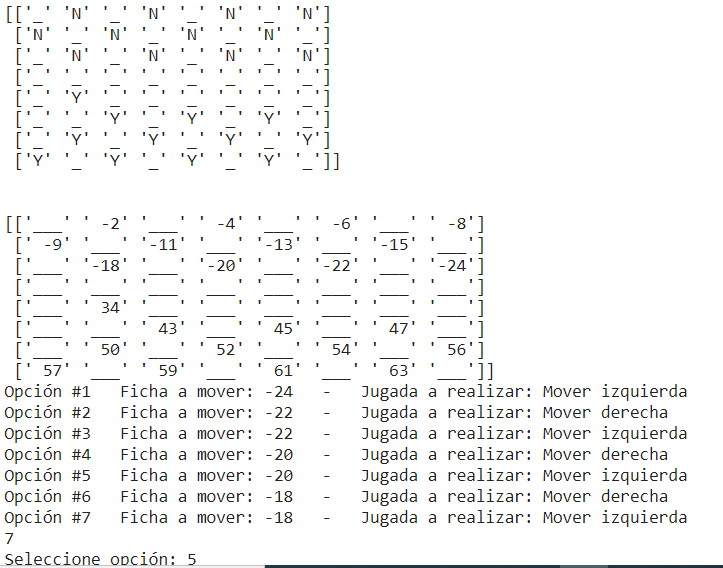

***Siempre moveremos fichas negativas y la IA se encargará de las positivas***.




In [ ]:
def constab(ocupated,kings):
    tab0=[]
    for i in range(1,65):
        if (i in ocupated):
            if (i in kings):
                tab0.append("X")
            else:
                tab0.append("Y")
        elif (-i in ocupated):
            if (-i in kings):
                tab0.append("O")
            else:
                tab0.append("N")
        else:
            tab0.append("_")
    
    return tab0

In [ ]:
def constab_num(ocupated,kings):
    tab0=[]
    st=""
    for i in range(1,65):
        if i in ocupated:
            if i<=9:
                st="  "
            else:
                st=" "
            tab0.append(st+str(i))
        elif -i in ocupated:
            if i<=9:
                st=" -"
            else:
                st="-"  
            tab0.append(st+str(i))
        else:
            tab0.append("___")
    return tab0


#***Profundidad del árbol es 3, si se desa cambiar debe modificarse de forma igual los valores resltados en la imagen para la cual profundidad es 5 **

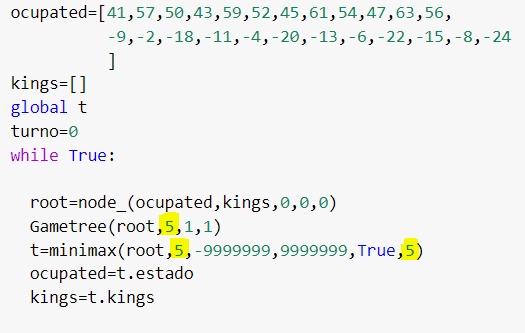

In [ ]:
def jugar():
  ocupated=[41,57,50,43,59,52,45,61,54,47,63,56,
            -9,-2,-18,-11,-4,-20,-13,-6,-22,-15,-8,-24
            ]
  kings=[]
  global t
  turno=0
  while True:
    
    root=node_(ocupated,kings,0,0,0)
    Gametree(root,3,1,1)
    t=minimax(root,3,-9999999,9999999,True,3)
    ocupated=t.estado
    kings=t.kings

    tab=constab(ocupated,kings)
    print(np.array(tab).reshape(8,8))
    tab_num=constab_num(ocupated,kings)
    print("\n")
    print(np.array(tab_num).reshape(8,8))
    opciones=[]


    if len(kings) == 2 and sum(1 for i in kings if i > 0) == sum(1 for i in kings if i < 0) and len(ocupated) == 2:
      print("Empate")
      break

    if sum(1 for i in ocupated if i > 0) == 0 and sum(1 for i in ocupated if i < 0) > 0:
      print("Ganaste")
      break
    
    if sum(1 for i in ocupated if i < 0) == 0 and sum(1 for i in ocupated if i > 0) > 0:
      print("Perdiste")
      break

    q=heuristica_hombre(ocupated,kings)

    if len(kings) == 2 and sum(1 for i in kings if i > 0) == sum(1 for i in kings if i < 0) and len(ocupated) == 2:
      print("Empate")
      break

    if sum(1 for i in ocupated if i > 0) == 0 and sum(1 for i in ocupated if i < 0) > 0:
      print("Ganaste")
      break
    
    if sum(1 for i in ocupated if i < 0) == 0 and sum(1 for i in ocupated if i > 0) > 0:
      print("Perdiste")
      break
    k=1

    nodos_k=[]

    for z in q:
      if z.ficha < 0:
        if z.play == 1 or z.play==6:
          nodos_k.append(z)
    if len(nodos_k)>0:
      q=nodos_k

    for i in q:

      if i.ficha < 0:
        opciones.append(i)

        acciones = {
          "1": "Matar con rey",
          "2": "Mover rey izquierda_arriba",
          "3": "Mover rey izquierda_abajo",
          "4": "Mover rey derecha_abajo",
          "5": "Mover rey derecha_arriba",
          "6": "Matar con ficha",
          "7": "Mover derecha",
          "8": "Mover izquierda"
        }
        if len(opciones) == 0:
          print("Perdiste")

        txt="Opción #{}   Ficha a mover: {}   -   Jugada a realizar: {} ".format(k,i.ficha,acciones[str(i.play)])
        print(txt)
        k=k+1
    print(len(opciones))
    select=input("Seleccione opción: ")
    ocupated=opciones[int(select)-1].estado
    kings=opciones[int(select)-1].kings


#Play

In [ ]:
jugar()